# Plant Species Classification

The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has released a dataset containing images of unique plants belonging to 12 species at several growth stages.

The ability to differentiate between a weed and a crop seedling can mean better crop yields and better stewardship of the environment.

# Problem:
- Classify the image based on the pixel value.
- The result of the model should be the number which is represented by the pixel values.
- Use Supervised Learning method for it.

# Data:
- **Labels.csv:** Total 12 unique values.
- **images.npy:** Each value in these columns is between 0 and 255. Which represents the pixel intensity. 

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow

from sklearn import svm
from sklearn.model_selection import train_test_split

from scipy.signal import convolve2d   # Convolve two 2-dimensional arrays

## Loading the data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images = np.load('./drive/MyDrive/images.npy')
images.shape

(4750, 128, 128, 3)

In [ ]:
img0 = images[0]
img1 = images[1]
img2 = images[2]
img3 = images[3]

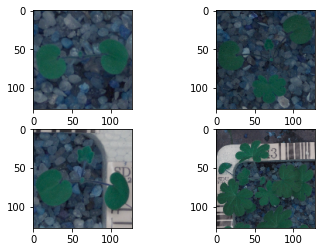

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img0)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img1)
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(img2)
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img3)

In [ ]:
SEED=123
LABELS = "./drive/MyDrive/Labels.csv"
data = pd.read_csv(LABELS)
data.shape

(4750, 1)

In [ ]:
Y = data.Label
Y

0       Small-flowered Cranesbill
1       Small-flowered Cranesbill
2       Small-flowered Cranesbill
3       Small-flowered Cranesbill
4       Small-flowered Cranesbill
                  ...            
4745             Loose Silky-bent
4746             Loose Silky-bent
4747             Loose Silky-bent
4748             Loose Silky-bent
4749             Loose Silky-bent
Name: Label, Length: 4750, dtype: object

In [ ]:
labels = data.Label.unique()
labels

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

# Data Pre-processing


In [ ]:
# Normalize the data
X = images.astype('float32') / 255.0

Original Image:



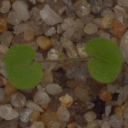


 Output after gaussian blurring: 



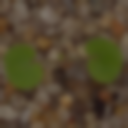

In [ ]:
Gaussian1 = cv2.GaussianBlur(img0, (15, 15), 0)
print('Original Image:\n')
cv2_imshow(img0)
print('\n Output after gaussian blurring: \n')
cv2_imshow(Gaussian1)

# Make data compatible

- Convert labels to one-hot-vectors.
- Print the label for y_train[0].
- Split the dataset into training, testing, and validation set.
(First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)
-Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

In [ ]:
labels_dict =  {0:'Black-grass', 1:'Charlock', 2:'Cleavers', 3:'Common Chickweed', 4:'Common wheat', 5:'Fat Hen', 6:'Loose Silky-bent', 7:'Maize', 8:'Scentless Mayweed', 9:'Shepherds Purse', 10:'Small-flowered Cranesbill', 11:'Sugar beet'}

In [ ]:
# Convert categorical values to dummy values
Y = pd.get_dummies(Y)
Y

,Black-grass,Charlock,Cleavers,Common Chickweed,Common wheat,Fat Hen,Loose Silky-bent,Maize,Scentless Mayweed,Shepherds Purse,Small-flowered Cranesbill,Sugar beet
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4745,0,0,0,0,0,0,1,0,0,0,0,0
4746,0,0,0,0,0,0,1,0,0,0,0,0
4747,0,0,0,0,0,0,1,0,0,0,0,0
4748,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Convert labels to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
Y = enc.fit_transform(Y)
Y

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
X.shape

(4750, 128, 128, 3)

In [ ]:
Y.shape

(4750, 12)

In [ ]:
# The data, split between train and test sets:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

first_label_train = y_train[0].tolist()
index_first = first_label_train.index(1)
labels_dict[index_first]

'Fat Hen'

In [121]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


# Build CNN

- Define layers.
- Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)


# Modelling and Evaluation

- Fit and evaluate model and print confusion matrix

# Visualize Predictions

- Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]